$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$
<body>
    <div>
        <tr><h1>
        <b><font face="Verdana">Exercise 6.6:</font></b>
        </h1></tr>
        <p>
            Assume Charlie has prepared the two spins in the singlet state. This time, Bob measure $\tau_y$ and Alice measures $\sigma_x$. What is the expectation value of $\sigma_x$$\tau_y$?<br>
        </p>
        <p>
            What does this say about the correlation between the two measurements?
        </p>
    </div>
</body>

In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, iplot_state_city
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
from math import pi

In [2]:
## this function is used as a simple way to calculate the state vector of a circuit qc
def stater(qc):
    backend_sim = BasicAer.get_backend('statevector_simulator')
    result = execute(qc, backend_sim).result()
    state = result.get_statevector(qc)
    print(state)
    return state

First we must create a singlet state using a circuit of two qubits.

In [3]:
a = QuantumRegister(1, 'a')
b = QuantumRegister(1, 'b')
qc = QuantumCircuit(a,b)

The following code lists out the different gates used in the circuit to connect them in a singlet state.

The simulator represents the four values of a given state vector and so we can see how the matrix of values would change after each new gate is added.

Possibilities represents the classical bits that could result after each new gate is added.

In [4]:
print('Original:')
stater(qc)
# insert a x gate on qubit a
qc.x(a)
print(1)
stater(qc)
## simulator: 0100
# insert a h gate on qubit b
qc.h(b)
print(2)
stater(qc)
## simulator: 0(0.7)0(0.7)
## at this point qubit a is guaranteed to be 1
## and qubit b can be either 0 or 1
## possibilities: 11,10
# insert a cx gate from qubit b to a
qc.cx(b,a)
print(3)
stater(qc)
## simulator: 0(0.7)(0.7)0
## at this point qubit a can be either 0 or 1
## and qubit b can be either 0 or 1 depending on qubit a
## possibilities: 10,01
# insert a z gate on qubit b
print('State Vector:')
qc.z(b)
## simulator: 0(0.7)(-0.7)0
## at this point qubit a can be either 1 or 0
## and qubit b can be either 1 or 0 in a negative superposition
## possibilities: 01,10
# store the state vector to calculate expectation value
singState = stater(qc)

Original:
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
1
[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
2
[0.        +0.j 0.70710678+0.j 0.        +0.j 0.70710678+0.j]
3
[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
State Vector:
[ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


<p>In summary, this circuit is made up of two qubits. An x gate is used on the first qubit, qubit a, and an h gate is used on the second qubit, qubit b.<br>
Then, a cx gate is used to connect qubit b to qubit a.<br>
Finally, a z gate is used on qubit b to give us our final state.</p>

In [5]:
iplot_state_city(singState)

This diagram represents the density matrix of the state vector. You can see here that only the combinations of $\ket{01}$ and $\ket{10}$ have block representations rather than flat squares. Additionally, you can see that two of the blocks are on the negative side of the graph because of the phase shift in a singlet state.

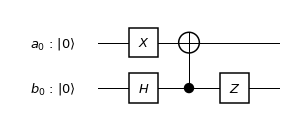

In [6]:
qc.draw(output='mpl')
# this is a maximally entangled system in a singlet state

[[ 0.   +0.j  0.707+0.j  0.   +0.j  0.707+0.j]
 [ 0.707+0.j  0.   +0.j  0.707+0.j  0.   +0.j]
 [-0.707+0.j  0.   +0.j  0.707+0.j  0.   +0.j]
 [ 0.   +0.j -0.707+0.j  0.   +0.j  0.707+0.j]]


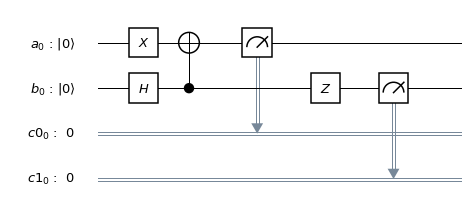

In [7]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))
c0 = ClassicalRegister(1, 'c0')
c1 = ClassicalRegister(1, 'c1')
meas = QuantumCircuit(a,b,c0,c1)
meas.draw(output='mpl')
meas.measure(a,c0)
meas.measure(b,c1)
circ = qc+meas
circ.draw(output='mpl')

In [8]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
# there are always only two solutions: 01 and 10

{'0 1': 488, '1 0': 536}


As shown by the simulator and histogram, only $\ket{01}$ and $\ket{10}$ are possibilities for this circuit. This partially verifies that the circuit is in a singlet state.

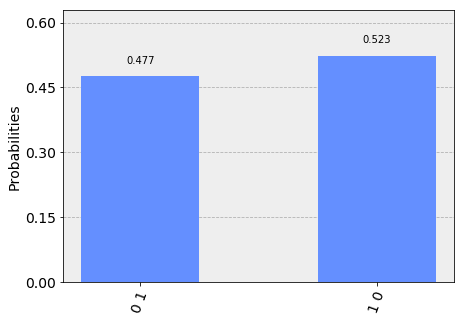

In [9]:
plot_histogram(counts)

<p>To find the expectation value of an operator, you can do it by hand or using qiskit:</p>
<p>Find the expectation value of $\sigma_x$$\tau_y$.</p>

<p><center>$\sigma_x$$\tau_y$$\ket{sing}$ = $\sigma_x$$\tau_y$($\frac{1}{\sqrt{2}}$)( $\ket{du}$ - $\ket{ud}$)<br>
           = $\tau_y$($\frac{1}{\sqrt{2}}$)( $\ket{uu}$ - $\ket{dd}$)<br>
           = ($\frac{1}{\sqrt{2}}$)( $\ket{ud}$ - $\ket{du}$)
</center> </p>          
If we square the equation and multiply the complex conjugate by the original equation, it becomes:
<p><center>= $\frac{1}{2}$( $\ket{ud}$ + $\ket{du}$)( $\ket{du}$ - $\ket{ud}$)<br>
           = $\frac{1}{2}$(1-1)<br>
           = 0</center></p>
So the expectation value of $\sigma_x$$\tau_y$ is 0.

Qiskit can also model the expectation values using matrices.

First, another circuit was created and appended onto our original circuit that represented the operatrs $\sigma_x$ and $\tau_y$.

The state vector for this circuit is stored as circuit1_state and represents the complex conjugate of the state vector of our original state vector singState.

The expectation value can then be calculated by taking the transpose of singState and multiplying it by circuit1_state.

This will also give you an expectation value of 0.

In [10]:
circuit = QuantumCircuit(a,b)
circuit.y(a)
circuit.x(b)
circuit1 = qc + circuit

result = execute(circuit1, backend = BasicAer.get_backend('statevector_simulator')).result()
circuit1_state = result.get_statevector(circuit1)
print('State Vector:' , circuit1_state)
print('Singlet State:' , singState)
print('Expectation Value:' , np.transpose(singState)@circuit1_state)

State Vector: [0.+0.j         0.-0.70710678j 0.-0.70710678j 0.+0.j        ]
Singlet State: [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]
Expectation Value: 0j
